<a href="https://colab.research.google.com/github/Hamid-GHub/Introduction-to-Deep-Leaning-Course-Week-4-Assignment/blob/main/Introduction_to_Deep_Learning_Week_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Disaster Tweets**

## **Introduction**

In this project a dataset of tweets is studied. The tweets are divided into two groups. Those that reflect natural disaster like flood, fire and the normal tweets that are not about any natural disater. The goal of this project is to build a deep learning model that can take an unseen tweet and predict whether or not it is about a natural disaster.

**Project Description** 

This projects deals with a dataset of tweets. Each example in the dataset is an individual tweet. A tweet can be about a disaster or not. The goal of this project is to build a recurrent neural network that given a unseen tweet can predict whether or not it is about a disaster.

**Narutal Language Processing Description (NLP)** 

Humans can easily comprehend written text. However, undestanding text is not that simple for a machine. Natural Langiage Processing is a branch of Artificial Intelligence that aims to enabling computers understand the human written text and extract insight from it.

In [ ]:
#Importing the necessary libraries
# ! pip install pyspellchecker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import re
import string
# from spellchecker import  SpellChecker
import nltk
from nltk.corpus import stopwords
from nltk.stem  import WordNetLemmatizer
from nltk import  pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# nltk.download('all')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# !wget  'https://nlp.stanford.edu/data/glove.6B.zip'  -P '/content/drive/MyDrive'

In [ ]:
# ! unzip /content/drive/MyDrive/glove.6B.zip  -d '/content/drive/MyDrive/glove.6B/'

In [ ]:
# # The following script downloads and unzips and loads the dataset from kaggle.com
# ! pip install -q kaggle
# from google.colab import files
# # files.upload()
# %cd /content
# ! rm -rf ~/.kaggle
# ! mkdir ~/.kaggle/
# ! cp /content/drive/MyDrive/kaggle.json    ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! rm -rf nlp-getting-started.zip
# ! kaggle competitions download -c nlp-getting-started
# ! rm -rf 'NLP Disaster Tweets'
# ! unzip -q nlp-getting-started.zip -d 'NLP Disaster Tweets' #unzip

In [ ]:
# ! cp  -r '/content/NLP Disaster Tweets'  /content/drive/MyDrive/

In [ ]:
# loading train and test datasets
train = pd.read_csv('/content/drive/MyDrive/NLP Disaster Tweets/train.csv')
test = pd.read_csv('/content/drive/MyDrive/NLP Disaster Tweets/test.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.shape

(7613, 5)

## **Data**

**Size:** There are 7613 tweets in the dataset. 

**Dimension:** The trasining datsets have 5 columns: id, keyword, location and target.

**Structure:** The data are organized in one folder which contains three csv files: train.csv , test.csv and the sample_submission.csv. The sample_submission.csv is to be filled by the solution returned in this project.

## **Data Cleaning**

This section cleans the raw tweets by removing items like hyperlinks, punctuations, emojis, etc.

### **Explaination of Data Cleaning Procedure**

The data cleaning procedure in this project includes the following items:

**Lower casing** the lower case and upper case does not matter much for NLP. Therefore all the letters can be converted to the lower case to reduce unnecessary complexity.

**Removing links** The hyperlinks are not that informative for this project. Therefor they are discarded.

**Removing punctuations**  Punctuations are also the the items that can be removed without losing any information.

**Removing line breaks** '\n' that represent line breaks can be easily removed as they do not represent ant information in the tweets.

**Removing emojis** emojis express emotions of the writer of tweets. However they can be deleted as they do not seems to be much correlated with the target of tweets (i.e. disaster or non-disaster)

**Removing HTML tags** The HTML tags are also the kind of unnecessary text elements for this project that can be eliminated.

**Removing stop words** stop words are those words that are very common in each English text and they are not meaningful and can be removed without losing the information of text.

**Lemmatization** a single root of a word can appear in different forms but all of these forms mean the same thing. Therefore, it is a good idea to unify all of these variations of word to their single root form.

### **Reason for choosing the cleaning procedure**.

The reason why the above decribed cleaning steps are chosen is because they are best practices in the natural langiage processing project and in practice they are effective and can yield good results.

In [ ]:
def lower_case(text): # Lower case the text
    return text.lower()

def remove_links(text): # removes hyperlinks
    return re.sub(r'https?://\S+','', text)

def remove_punctuations(text):
    return text.translate(str.maketrans('','', string.punctuation))

def remove_line_break(text): # removes line breaks \n
  return re.sub('\n','', text)

def remove_emoji(text):  # removes emoji
   emoji_pattern =  re.compile("["
        u"\U0001F600-\U0001F64F"  # this represents emoticons
        u"\U0001F300-\U0001F5FF"  # this represents symbols and pictographs
        u"\U0001F680-\U0001F6FF"  # this represents transport and map symbols
        u"\U0001F1E0-\U0001F1FF"  # this represents flags (iOS)
                           "]+", flags = re.UNICODE)
   
   return emoji_pattern.sub(r'', text)
  
def remove_html(text): # removes html tags from text
    cleaner = re.compile ('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(cleaner, '', text )

def correct_spelling(text): # corrects the spelling
    spell = SpellChecker()
    corrected_text = []
    typo_words = spell.unknown(text.split())

    for word in text.split():

        if word in typo_words and spell.correction(word) :
           
           corrected_text.append(spell.correction(word))
        else:
           corrected_text.append(word)
    return " ".join(corrected_text)

def remove_stopwords(text): # removes frequent words as known as stop words
    return ' '.join([word for word in text.split(' ') if word not in stopwords.words('english')])

def lemmatize(text):# convert a word to its root form
    
    wnl = WordNetLemmatizer()
    lemma =''
    for word, tag in pos_tag(word_tokenize(text)):
      
       tag = tag[0].lower()
      
       tag = tag if tag in [ 'a','r','n','v'] else None
       
       if not tag :
          lemma += word
       else:
          lemma += wnl.lemmatize(word, tag)
      

    return lemma

In [ ]:
text = '<h1> This is, the link I tld you! \n : http://site.com \U0001F6FF </h1> '
# print(lower_case(text))
# print(remove_links(text))
# print(remove_punctuations(text))
# print(remove_line_break(text))

# print( remove_emoji(text))

# print( remove_html(text))

# print(correct_spelling(text))

# print (lemmatize('bought'))

In [ ]:
text = '<h1> This is, the link I tld you! \n : http://site.com \U0001F6FF </h1> '

# packs all the above cleaning steps in a single function
def clean(text):
    
    text = lower_case(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_line_break(text)
    text = remove_links(text)
    text = remove_punctuations(text)
    # text = correct_spelling(text)
    text = remove_stopwords(text)
    test = lemmatize(text)
    return text

clean(text)

' link tld      '

In [ ]:
# tweets = pd.concat([train,test])

In [ ]:
# applies the cleaning function to the training and test sets
train['clean_text'] = train['text'].apply(clean)
test['clean_text'] = test['text'].apply(clean)

In [ ]:
train[['text','clean_text']].head()

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...


## **Exploratory Data Analysis**

This section produce some visualizations that helps to better understand data.

**Class Distribution**

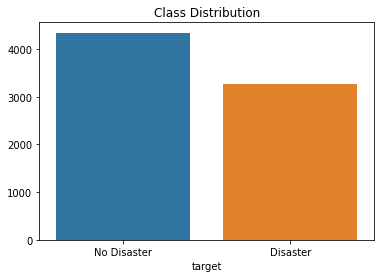

In [ ]:
#plots the number of tweets for each group of tweets, either disaster tweets or non-disaster tweets
class_dist = train.groupby('target').size() # grouping the exmaples by target 0 and 1

ax = sns.barplot(x=class_dist.index, y=class_dist.values)
ax.set_title('Class Distribution')
ax.set_xticklabels(['No Disaster','Disaster'])
plt.show()

As it is observed from the above plot, the number of tweets with no disaster is more than that of disaster tweets. This implies that the training set is imbalanced. Therefore, it would be a good idea to evaluate the model on this dataset mainly based on metrics like F1 Score or Area Under the Curve of Precision - Recall (or AUC - PR)

**Most common words in disaster class**

In [ ]:
# subsets the training set based on the class label
def corpus( target = None): 

  if  target is None:
    return train['clean_text']

  else:
    return train[train.target ==target]['clean_text'].str.split().sum()

**Most Frequent Words in Non-Disaster Tweets**


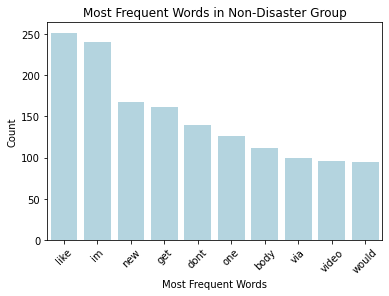

In [ ]:
#This piece of code subsets the no disaster tweets and plot the most frequrnt words in them
no_disaster = corpus( 0)


most_common = Counter(no_disaster).most_common(10)
x, y = list(zip(* Counter(no_disaster).most_common(10)))


ax = sns.barplot(x=list(x),y=list(y), color='lightblue')
plt.xticks(rotation = 45)
ax.set(xlabel = 'Most Frequent Words', ylabel = 'Count', title = 'Most Frequent Words in Non-Disaster Group')
plt.show()

**Most Frequent Words in Disaster Tweets**

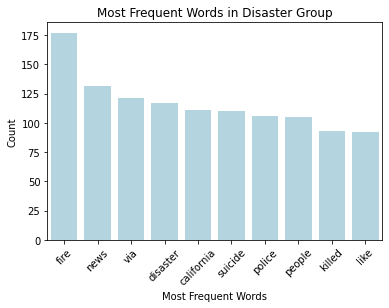

In [ ]:
#This piece of code subsets the no disaster tweets and plots the most frequent words in tweets
disaster = corpus (1)

most_common = Counter(disaster).most_common(10)
x, y = list(zip(* Counter(disaster).most_common(10)))

ax = sns.barplot(x=list(x),y=list(y), color='lightblue')
plt.xticks(rotation = 45)
ax.set(xlabel = 'Most Frequent Words', ylabel = 'Count', title = 'Most Frequent Words in Disaster Group')
plt.show()

**Most Frequent Bigrams in Non-Disaster Tweets**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


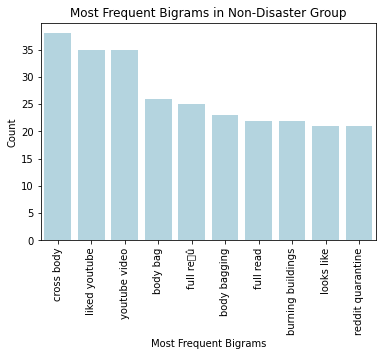

In [ ]:
#This piece of code plots the most frequent bigrams in non-disaster tweets


x,y = zip(*Counter(nltk.bigrams(no_disaster)).most_common(10))

x =  [' '.join(pair) for pair in x ]
ax = sns.barplot(x=list(x), y=list(y), color = 'lightblue')
plt.xticks(rotation = 90)

ax.set(xlabel = 'Most Frequent Bigrams', ylabel = 'Count', title = 'Most Frequent Bigrams in Non-Disaster Group')
plt.show()

**Most Frequent Bigrams in Disaster Tweets**

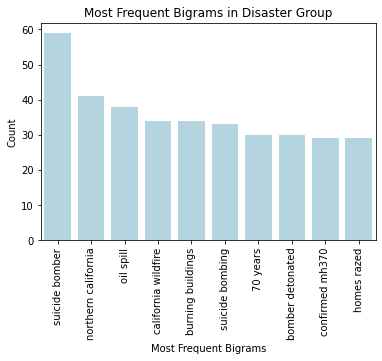

In [ ]:
#This piece of code plots the most frequent bigrams in disaster tweets

x,y = zip(*Counter(nltk.bigrams(disaster)).most_common(10))

x =  [' '.join(pair) for pair in x ]
ax = sns.barplot(x=x, y=list(y), color = 'lightblue')
plt.xticks(rotation = 90)

ax.set(xlabel = 'Most Frequent Bigrams', ylabel = 'Count', title = 'Most Frequent Bigrams in Disaster Group')

plt.show()

**Word Cloud for Non-Disaster Tweets**



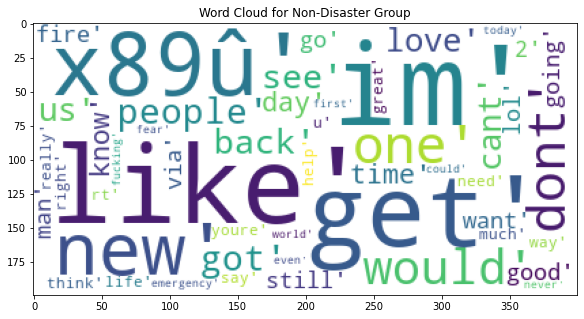

In [ ]:
# Plotting a word cloud for non-disaster tweets
wc = WordCloud(background_color ='white', max_words =50).generate(str(no_disaster))
plt.figure( figsize =(10,5))
plt.imshow(wc)
ax = plt.gca()
ax.set(title = 'Word Cloud for Non-Disaster Group')
plt.show()

**Word Cloud for Disaster Tweets**

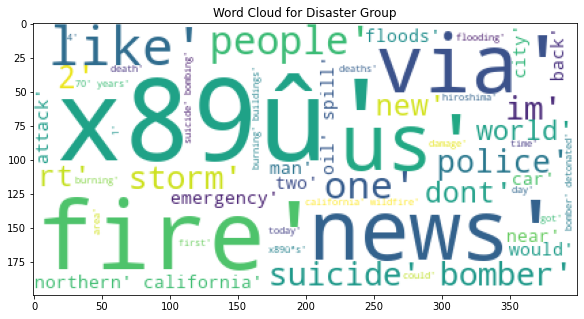

In [ ]:
# Plotting a word cloud for disaster tweets
wc = WordCloud(background_color ='white', max_words =50).generate(str(disaster))
plt.figure( figsize =(10,5))
plt.imshow(wc)
ax = plt.gca()
ax.set(title = 'Word Cloud for Disaster Group')
plt.show()

**Train Test Split**

This section splits the original traiining dataset into two sets of training (80%) and test set(%20) (or actually validation set). The validation set can be used for model selection or  hyperparameter tuning.

In [ ]:
#splitting the training set
X_train,X_test, y_train,y_test  = train_test_split(train['clean_text'],train['target'], test_size =0.2, random_state =123)

In [ ]:
X_train.head()

6445    turkish troops killed kurdish militant suicide...
3870    aisumage akumareisu gray ophelia red flames bl...
2431    tubestrike derailed robertwelch cutlery offers...
5355    truly scene chaos unprecedented frenzy pandemo...
6496    everything sunk except fact actually moving st...
Name: clean_text, dtype: object

## **Plan of Analysis based on EDA (Word Embeddings)**

In this section two  **word embedding** methods are explained. machine learning algorithms work with feature matrix made from obsevations and features. Word embedding is a special procedure for converting a given blob of text to vector of feature. In other words, word embedding is the way that features are extracted from text.

**Terms Frequency Inverse Document Frequency (TF-IDF)**



One of the ways to convert a blob of text to a feature vector is through a method called TF-IDF. The terms is abbreviation of *Term Frequency Inverse Document Frequency*. The length of the vector is equal to the number of terms in the corpus. The corpus is collection of all the documents. For each word in the document the TF-IDF is calculated by product of frequency of that word in the document to inverse of its relative frequency in the whole corpus. For each word in the corpus and each document, TF-IDF is calculated as follows:

$$ TFIDF = TF \times IDF $$

$$ TF (term) = \frac {\text {number of this term in the Document } }{\text{ length of document}} $$




$$ IDF (term) = \log \bigg ( {\frac{ \text {number of documents in the corpus }  }{\text{Number of documents in the corpus that contain the term } } \bigg ) } $$ 

In [ ]:
# converting the training and test tweet text into tokens of inidivual words.
tfidf_vectorizer =TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_tfidf.toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Global Vectors for Word Representation (GloVe)**

GloVe is a another technique for inferring the word embedding from text . GloVe stands for Global Vectors for Word Representation and proposed by a team of researchers in Stanford University. It takes advantage of co-occurrence matrix to extract feature vector of each word. Each cell in the co-occurrence matrix is the number of times two word appear in vicinity of each other ( like in one sentence or a fixed windows) in the corpus. GloVe attemps to iteratively minimize a loss function in the squared form as shown in the below formula:

$$ J=  \sum_{i,j=1}^{V}f(X_{ij}) \bigg ( w_i^T \tilde {w_j} + b_i + b_j - \log X_{ij} \bigg) $$

where $w_i$ and $w_j$ are feature vectors for word $i$ and $j$ respectively and $b_i$ and $b_j$ are biases for for word $i$ and $j$ respectively.. $X_{ij}$ is the number of times word $i$ appears in the context of word $j$. $f$ is a weighting function.

**Reasoning for Choosing GloVe method**

In this project, GloVe word embedding is preferred over TFIDF as GloVe preserves the similarity and dissimilarity between different words in the corpus.

In [ ]:
train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
# puting train and test set together in order to to make them ready for tokenizer process
tweets  = pd.concat([train['clean_text'], test['clean_text']])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

In [ ]:
tweets.head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: clean_text, dtype: object

In [ ]:
# converting the words to their corresponding number in the vocabulary and then padding the tweet texts.
sequences = tokenizer.texts_to_sequences(tweets)
padded_sequences = pad_sequences(sequences, padding='post')

In [ ]:
padded_sequences

array([[5613,  724,  147, ...,    0,    0,    0],
       [  77,    3,  114, ...,    0,    0,    0],
       [1426, 1346, 2070, ...,    0,    0,    0],
       ...,
       [ 703,  434,  324, ...,    0,    0,    0],
       [4141,  491,  325, ...,    0,    0,    0],
       [4047, 2521, 1419, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# finding the length of the longest tweet.
max_tweet_length = tweets.str.split().apply(len).max()
max_tweet_length

24

In [ ]:
padded_sequences.shape

(10876, 24)

In [ ]:
# This piece of code loads GloVe word embeddings from a text file and assign each embedding to its corresponding word in the vocabulary of tweets
glove ={}
with open('/content/drive/MyDrive/glove.6B/glove.6B.100d.txt') as f:
  for line in f:
    word, *embedding = line.split()
    embedding = np.asarray(embedding,'float32')
    glove[word] = embedding  

    

vocab_length = len(tokenizer.word_index) +1
embedding_matrix = np.zeros((vocab_length, 100))

for word, index in tokenizer.word_index.items():
    embedding_vector = glove.get(word)

    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
max_tweet_length

24

## **Model Architecture**

In this section, the chosen model architecture is described. In addition, the reasoning behnid choosing the model is provided.

**Dessription of the architecture**

The architecture for this projects begins with input layer and embedding layer. The embedding layer trabslates a sequence of words to sequence of 100 dimensions embedding. The embedding for each word is generated by GloVe algorithm which was described in the earlier section.
The next layer is a Long Short Term Memory (LSTM) with 50 cells. This is followed by a dropout layer with probability 0.2. Finally, the architecture ends with a one neuron dense layer  and sigmoid activation function.

The loss function is binary cross entropy.

**Explanation for choosing this particular architecture**

The reason behind choosing the current architecture is the high performance and applicability of LSTM layer. In addition, the GloVe word embedding in this architecture provides an effective way of feature extraction from tweets

In [ ]:
# This piece of code specifies the above described architecture in the keras sequential API
model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = max_tweet_length, trainable = False)

model.add(embedding_layer)
model.add (LSTM(50, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1,activation ='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           2292100   
                                                                 
 lstm (LSTM)                 (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,322,351
Trainable params: 30,251
Non-trainable params: 2,292,100
_________________________________________________________________


In [ ]:
#defining Adam optimizer and Area under the curve of precision recall
adam =  Adam(learning_rate =1e-3)
auc_pr = AUC(curve= 'PR', name = 'AUC -PR')
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics =[auc_pr,'accuracy'])


In [ ]:

train_glove = padded_sequences[:train.shape[0]]
test_glove = padded_sequences[train.shape[0]:]

In [ ]:
type(test_glove)

numpy.ndarray

In [ ]:
train_glove.shape[0] + test_glove.shape[0]

10876

In [ ]:
#splitting the original training set of padded word embeddings to training and test (actually validation) set.
X_train, X_test, y_train, y_test = train_test_split(train_glove, train['target'], test_size = 0.2)

In [ ]:
history = model.fit(X_train, y_train, batch_size =32, epochs = 10, validation_data = (X_test,y_test))

Epoch 1/10
191/191 [==============================] - 11s 40ms/step - loss: 0.5051 - AUC -PR: 0.8023 - accuracy: 0.7639 - val_loss: 0.4482 - val_AUC -PR: 0.8517 - val_accuracy: 0.8037
Epoch 2/10
191/191 [==============================] - 15s 79ms/step - loss: 0.4483 - AUC -PR: 0.8471 - accuracy: 0.8021 - val_loss: 0.4503 - val_AUC -PR: 0.8545 - val_accuracy: 0.8037
Epoch 3/10
191/191 [==============================] - 12s 61ms/step - loss: 0.4372 - AUC -PR: 0.8576 - accuracy: 0.8056 - val_loss: 0.4395 - val_AUC -PR: 0.8545 - val_accuracy: 0.8089
Epoch 4/10
191/191 [==============================] - 7s 36ms/step - loss: 0.4284 - AUC -PR: 0.8612 - accuracy: 0.8123 - val_loss: 0.4426 - val_AUC -PR: 0.8534 - val_accuracy: 0.8116
Epoch 5/10
191/191 [==============================] - 7s 35ms/step - loss: 0.4135 - AUC -PR: 0.8781 - accuracy: 0.8158 - val_loss: 0.4336 - val_AUC -PR: 0.8570 - val_accuracy: 0.8168
Epoch 6/10
191/191 [==============================] - 7s 35ms/step - loss: 0.4012 

**Hyperparameter Tuning**

The strategy for hyperparamter tuning in this project could be through trial-and-error. That means a change to the combinations of values for learning rate, number of epochs, batch size, number of LSTM cells should be tried and each time the validation metric (Area Under Curve of - Precision Recall in this project) should be looked. In case, the value for AUC-PR increased the change in the hyperparameter has been effective. This helps to come up with a better set of hyperparameters.

It is to be noted, when the suffcient computational power (e.g. GPU) is available,a better and systematic way of (random) grid search method for hyperparameter tuning can be used which can yield better results.

# **Result and Analysis**
In this section, some results after training the model with chosen architecture is presented.

**Visualizations**

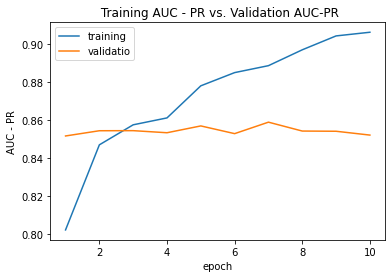

In [ ]:
#This piece of code plots the AUC-PR for both training and validation set across 10 epochs of training.
history.history['AUC -PR']
sns.lineplot(x=range(1,11),y = model.history.history['AUC -PR'], label = 'training')
ax = sns.lineplot(x=range(1,11),y = model.history.history['val_AUC -PR'], label = 'validatio')
ax.set(xlabel = 'epoch', ylabel = 'AUC - PR', title = ' Training AUC - PR vs. Validation AUC-PR')
plt.show()

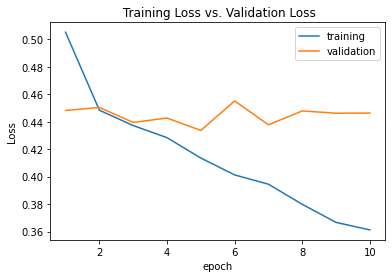

In [ ]:
#This piece of code plots the loss for both training and validation set across 10 epochs of training.
sns.lineplot(x=range(1,11),y = model.history.history['loss'], label = 'training')
ax = sns.lineplot(x=range(1,11),y = model.history.history['val_loss'], label = 'validation')

ax.set(xlabel = 'epoch', ylabel = 'Loss', title = ' Training Loss vs. Validation Loss')
plt.show()

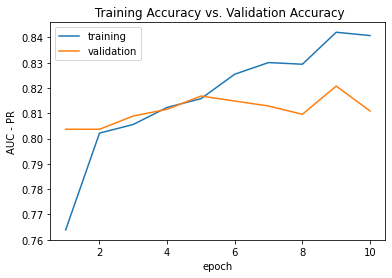

In [ ]:
#This piece of code plots the accuracy for both training and validation set across 10 epochs of training.
sns.lineplot(x=range(1,11),y = model.history.history['accuracy'], label = 'training')
ax = sns.lineplot(x=range(1,11),y = model.history.history['val_accuracy'], label = 'validation')

ax.set(xlabel = 'epoch', ylabel = 'AUC - PR', title = ' Training Accuracy vs. Validation Accuracy')
plt.show()

**Why some hyperparameters did not work well**

When trying different values for the number of LSTM cells, it appeared that the number of cells more than 100 has no much effect on the performance of the model and this could be sign of overfitting as a reuslt of overly model complexity.

**Troubleshooting Procedure**

A potential troubleshouting could be taking advantage of more effective hyperparameter tuning methods like grid search to come up with better combination of hyperparameters.

## **Conclusion**

This section colclude the project by presenting the summary of results, discussion and potential improvement for future work.

**Summary of results**

The model with chosen architecture was evaulated against a validation set of tweets. The main evaulation metric was area under the curve of precision recall as known as AUC - PR. The selection of AUC-PR as a metric was due to the imbalanced dataset of tweets. However, additional metrics of accuracy was also included. The result show that after 10 epochs the AUC-PR for validation set reaches 0.85 which is indicative of good performance.

**Discussion of learning and Takeways**

The main takeaway from this project is validating the usability of the current architecture for the dataset of tweets. Howerever, further performance improvement seems necessary in order for the model to be ready for the production and deployment.


**Suggestion for improving the work**

A potential improvement for the current work could be taking advantage of more advanced cleaning steps for the tweets dataset. In addition, other architecture and models such as GRU or BERT can be explored and hopefully one of them would result in a better solution.

In [ ]:
#loading submission template file and filling it with the results of predictions.
submission = pd.read_csv('/content/drive/MyDrive/NLP Disaster Tweets/sample_submission.csv')
y_pred = (model.predict(test_glove) > 0.5 ). astype('int32')
submission['target'] = y_pred
submission.head(20)

102/102 [==============================] - 2s 15ms/step


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [ ]:
test['y_pred']=  submission.target
test.head(10)

,id,keyword,location,text,clean_text,y_pred
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 china taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,shakingits earthquake,1
6,21,NaN,NaN,They'd probably still show more life than Arse...,theyd probably still show life arsenal yesterd...,0
7,22,NaN,NaN,Hey! How are you?,hey,0
8,27,NaN,NaN,What a nice hat?,nice hat,0
9,29,NaN,NaN,Fuck off!,fuck,0


In [ ]:
!pwd

/content


In [ ]:
#Saving the filled submission file to disk
submission.to_csv('submission.csv', index = False)